In [24]:
import math
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

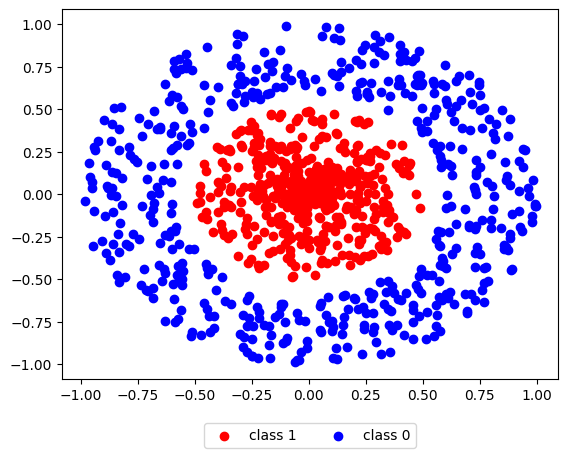

In [25]:
### code to generate datasets and visualize those

np.random.seed(0)

def generate_dataset(N_points):
    # 1 class
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)

    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)

    # 0 class
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)

    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)

    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y

N_points = 1000
X, Y = generate_dataset(N_points)

plt.scatter(X[:N_points//2, 0], X[:N_points//2, 1], color='red', label='class 1')
plt.scatter(X[N_points//2:, 0], X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

In [26]:
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}

def sigmoid(z):
   return 1/(1+(np.exp(-z)))

def forward_propagation(X, weights):
  # this implements the vectorized equations defined above.
  #...........................
  #...........................# calculate output for the hidden layer
  #...........................
  #...........................# calculate output for the output layer
  Z1 = np.dot(X,weights['W1'].T) + weights['b1']
  H = sigmoid(Z1)
  Z2 = np.dot(H, weights['W2']) + weights['b2']
  Y = sigmoid(Z2)
  
  return Y, Z2, H, Z1
forward_propagation(X,weights)
print(weights['W1'])
print(weights['W1'].shape)


[[-0.1049797   1.36741498]
 [-1.65534404  0.15364446]
 [-1.58447356  0.84445431]]
(3, 2)


In [27]:
print(Y)
print(Y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [28]:
def crossentropyloss(N, Y_T,Y):
  return (1/N) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))

In [29]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y,Z2,H,Z1=forward_propagation(X,weights)

    L = crossentropyloss(N_points, Y_T, Y)
    # back propagation
    #.....................
    #.....................
    #.....................# calculate dLdW2
    dldy = 1/N_points * ((Y - Y_T) / (Y * (1 - Y)))
    dldz2 = dldy * sigmoid(Z2) * (1 - sigmoid(Z2))
    dLdW2 = np.dot(H.T, dldz2)
    #.....................# calculate dLdb2
    dLdb2 = np.sum(dldz2, axis=0)
    #.....................
    #.....................
    #.....................# calculate dLdW1
    dLdh = np.dot(dldz2.reshape(-1, 1), weights['W2'].reshape(1, -1))
    dLdz1 = dLdh * sigmoid(Z1) * (1 - sigmoid(Z1))
    dLdW1 = np.dot(dLdz1.T, X)
    #.....................# calculate dLdb1
    dLdb1 = np.sum(dLdz1, axis=0)
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

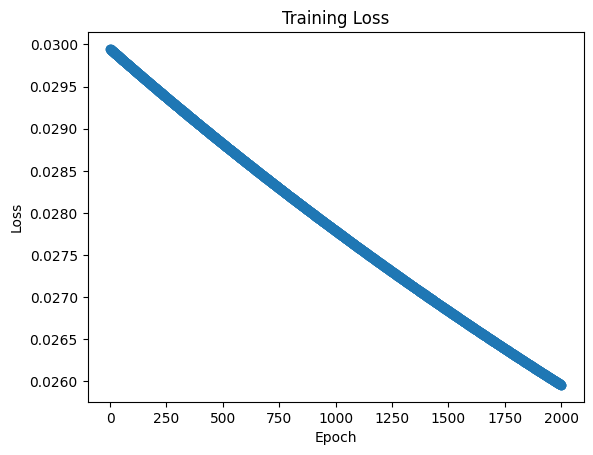

In [34]:
epochs = 2000
epsilon = 1
initial_weights = copy.deepcopy(weights)
l_rate=0.01
losses = []
for epoch in range(epochs):
    gradients, loss = back_propagation(X, Y, weights)
    for weight_name in weights:
            weights[weight_name] = weights[weight_name] - epsilon * gradients[weight_name]
    losses.append(loss)
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [35]:
def visualization(weights, X_data, title, superposed_training=False):
    N_test_points = 1000
    xs = np.linspace(1.1*np.min(X_data), 1.1*np.max(X_data), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_propagation(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial)
    plt.colorbar(label='P(1)')
    if superposed_training:
        plt.scatter(X_data[:N_points//2, 0], X_data[:N_points//2, 1], color='red')
        plt.scatter(X_data[N_points//2:, 0], X_data[N_points//2:, 1], color='blue')
    plt.title(title)
    plt.show()

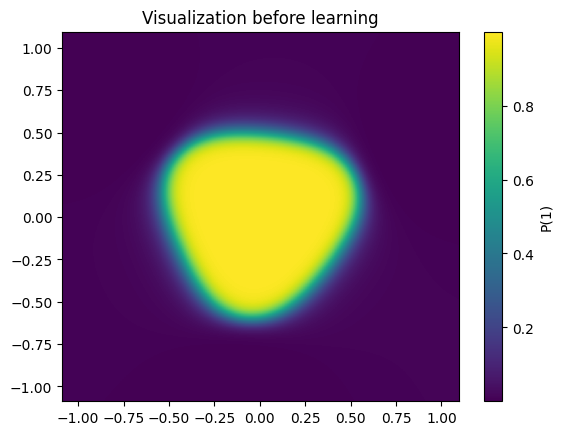

In [36]:
visualization(initial_weights, X,  'Visualization before learning')

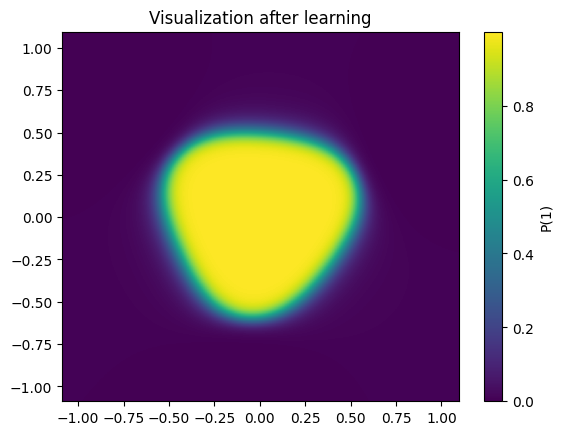

In [37]:
visualization(weights, X, 'Visualization after learning')

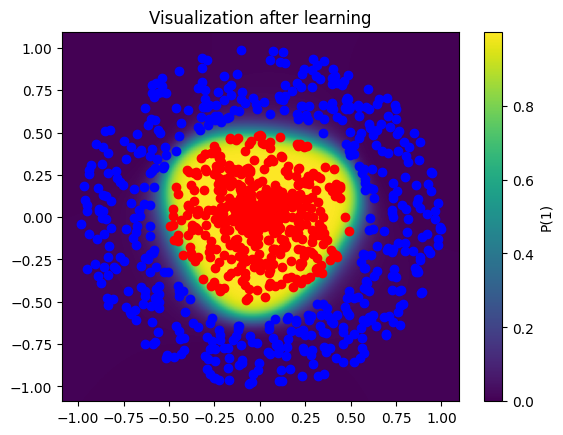

In [38]:
visualization(weights, X, 'Visualization after learning', superposed_training=True)

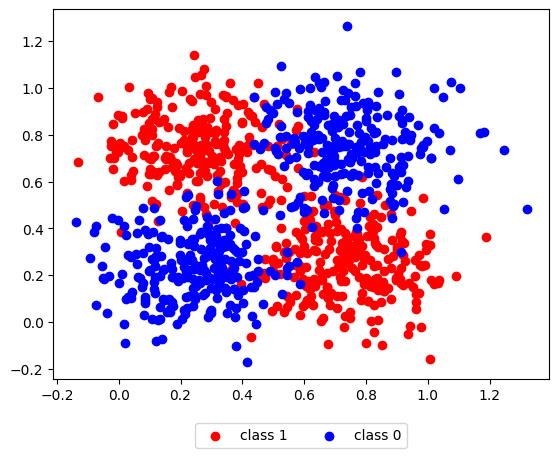

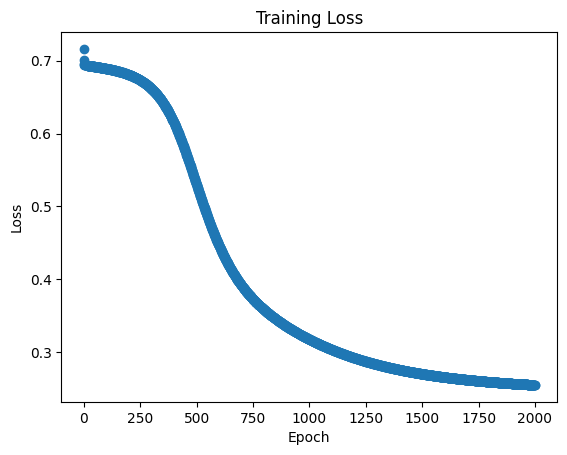

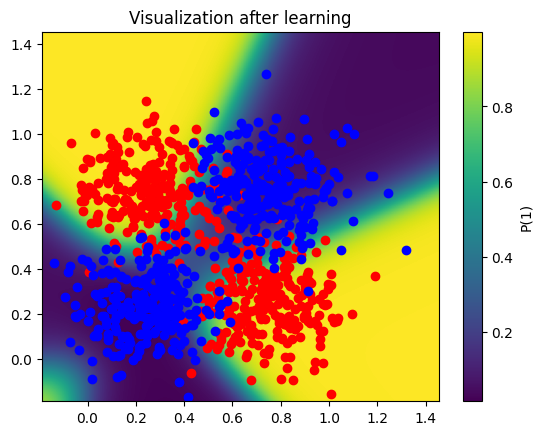

In [39]:
def generate_xor_like_dataset(N_points):
    # 1 class
    X_class_1 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1),
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)),
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1),
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)),
            axis=1))
    )
    Y_class_1 = np.full((N_points//2,), 1)

    # 0 class
    X_class_0 = np.concatenate(
        (np.concatenate(
            (np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1),
             np.random.normal(0.25, 0.15, size=N_points//4).reshape(N_points//4,1)),
            axis=1),
        np.concatenate(
            (np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1),
             np.random.normal(0.75, 0.15, size=N_points//4).reshape(N_points//4,1)),
            axis=1))
    )
    Y_class_0 = np.full((N_points//2,), 0)

    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y

xor_X, xor_Y = generate_xor_like_dataset(N_points)

plt.scatter(xor_X[:N_points//2, 0], xor_X[:N_points//2, 1], color='red', label='class 1')
plt.scatter(xor_X[N_points//2:, 0], xor_X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

xor_weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
xor_initial_weights = copy.deepcopy(xor_weights)
xor_losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(xor_X, xor_Y, xor_weights)
    for weight_name in xor_weights:
        xor_weights[weight_name] -= epsilon * gradients[weight_name]
    xor_losses.append(L)

plt.scatter(range(epochs), xor_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

visualization(xor_weights, xor_X, 'Visualization after learning', superposed_training=True)